In [1]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


<Axes: xlabel='timestamp'>

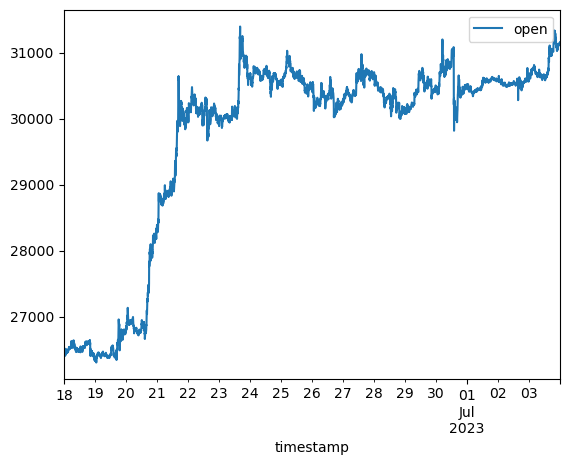

In [2]:
data = data[['open']]

data.plot()

In [3]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [4]:
data.head()

,open
timestamp,
2023-06-18 00:00:00,26519.10
2023-06-18 00:05:00,26508.01
2023-06-18 00:10:00,26511.30
2023-06-18 00:15:00,26519.44
2023-06-18 00:20:00,26513.33


In [5]:
from sklearn.model_selection import train_test_split

def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
  for i in range(lag_start,lag_end):
    data[f"lag_{i}"] = data["open"].shift(i)
  data = data.dropna()
  data["minute"] = data.index.minute
  data["minute_average"] = list(map(code_mean(data,"minute","open").get,data.minute))
  data.drop("minute",axis=1,inplace=True)
  X = data.drop("open",axis=1)
  y = data["open"]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=False)

  return X_train, X_test, y_train, y_test

C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\2681355653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["minute"] = data.index.minute
C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\2681355653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["minute_average"] = list(map(code_mean(data,"minute","open").get,data.minute))
C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\2681355653.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

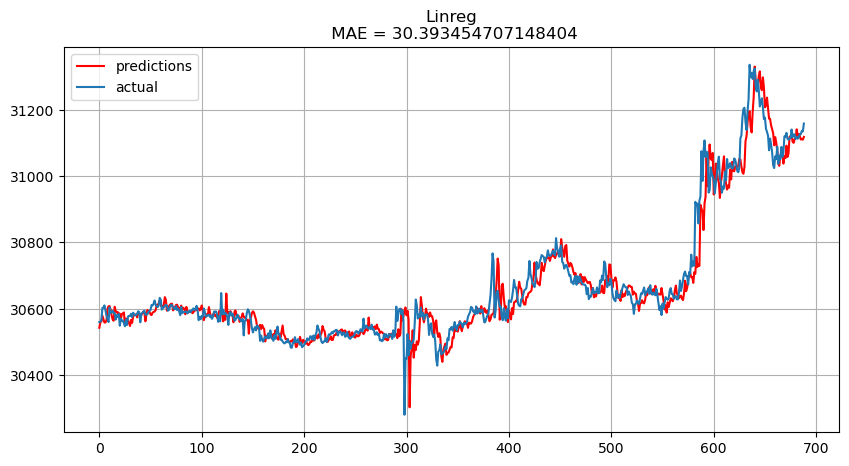

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = preprocess_data(data)
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(preds,"r",label="predictions")
plt.plot(y_test.values,label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linreg\n MAE = {mean_absolute_error(preds,y_test)}");